<a href="https://colab.research.google.com/github/JessicaMartins22/Trabalho-de-Analise-Preditiva/blob/main/Daise_Jessica_Joao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insira os dados em excel:
⚠️ Aviso: 'pt_BR.UTF-8' não disponível no Colab. Usando localidade padrão.


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados (5).xlsx
📌 Colunas encontradas no Excel: ['Timestamp', 'Camisetas_básicas_masculinas']
Colunas disponíveis: ['data', 'camisetas_básicas_masculinas']
Sugestão: Renomear a coluna 'camisetas_básicas_masculinas' para 'vendas'


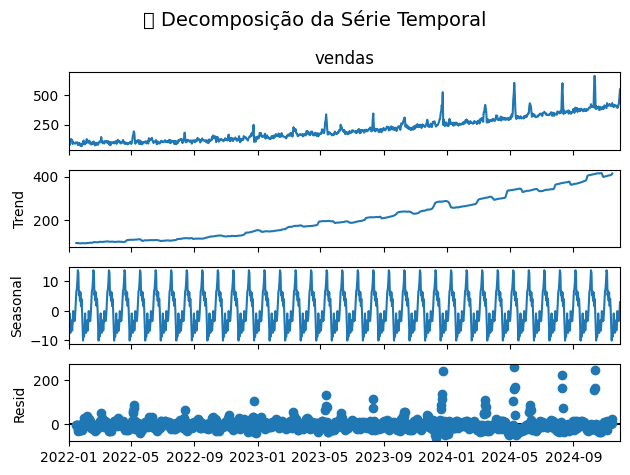

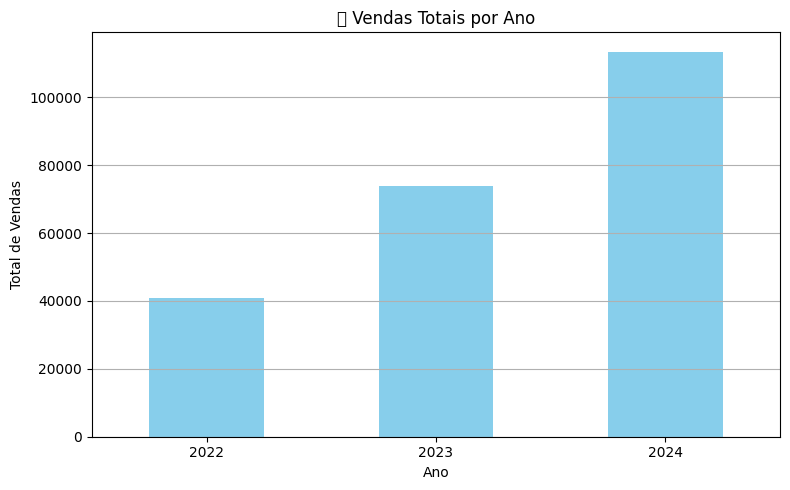

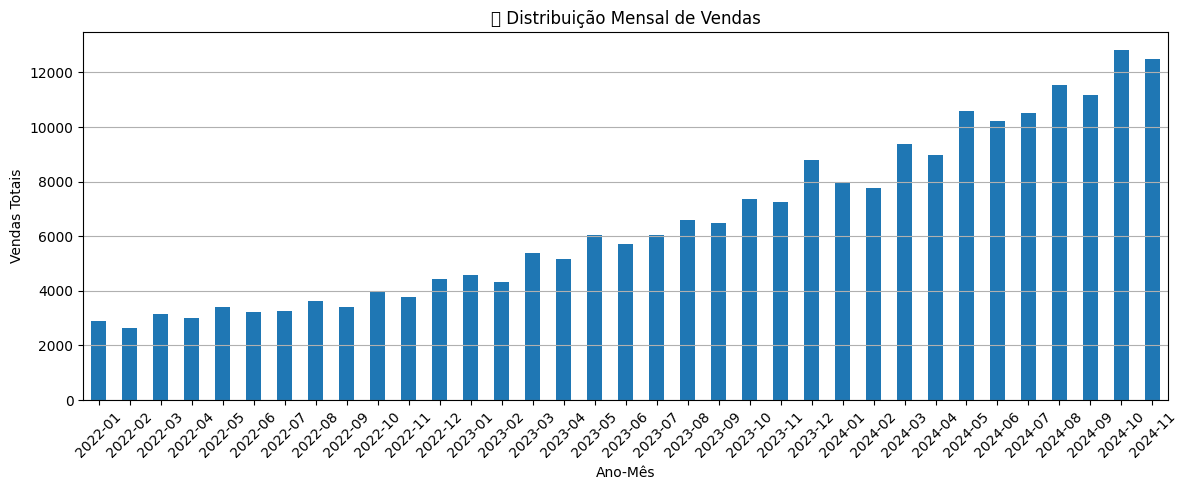

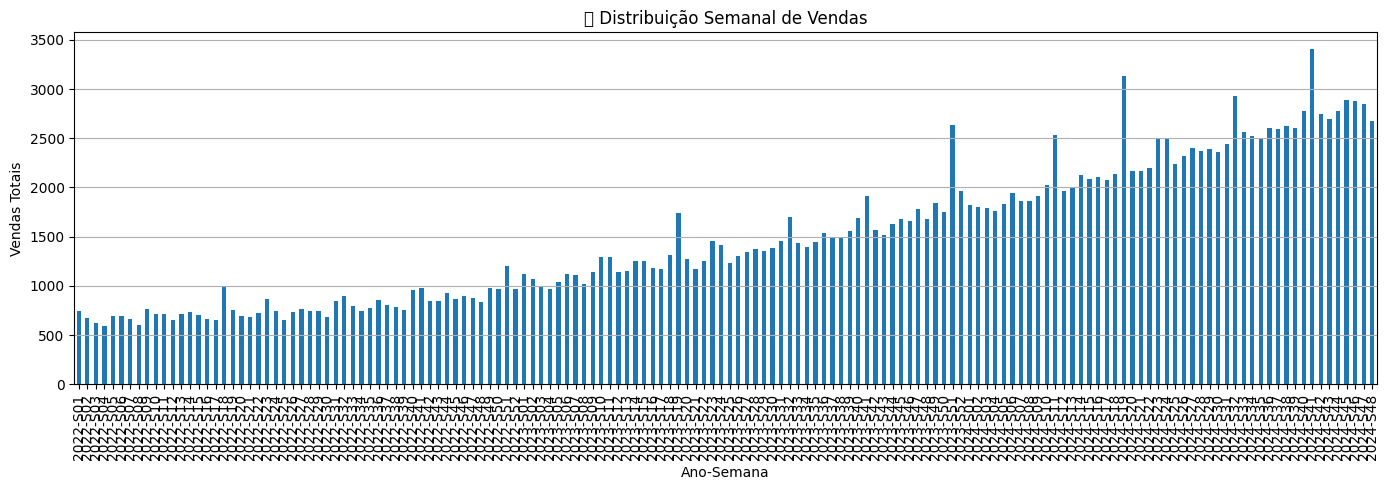

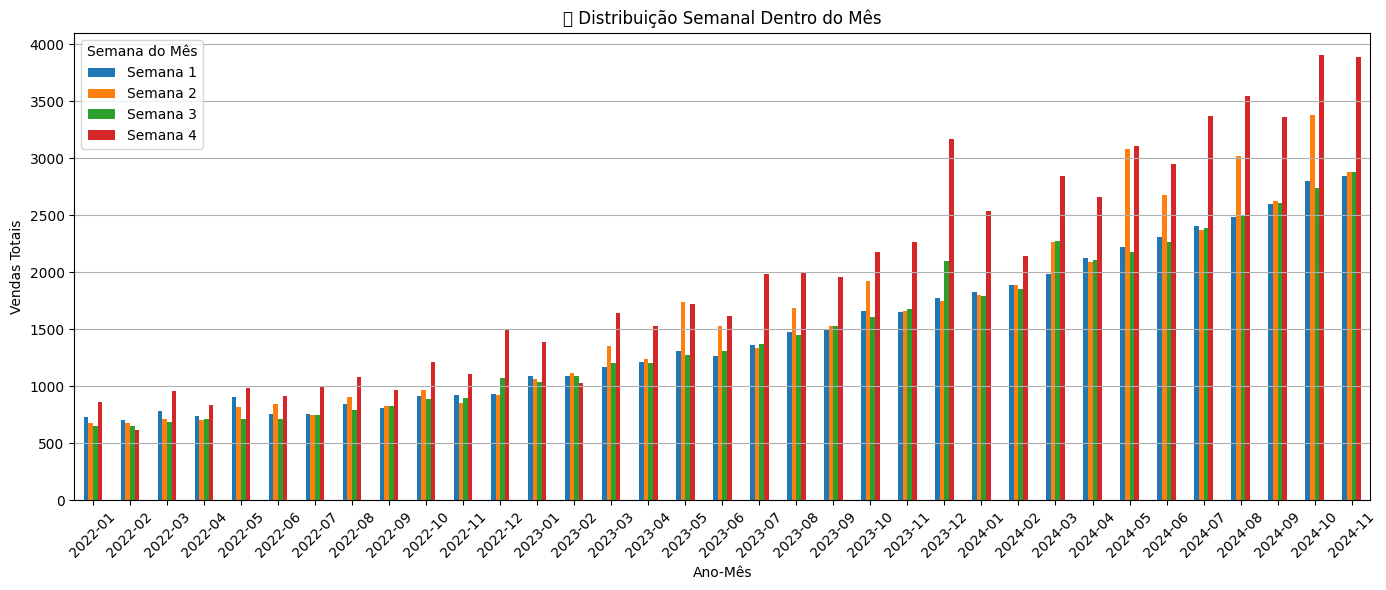

<Figure size 1200x600 with 0 Axes>

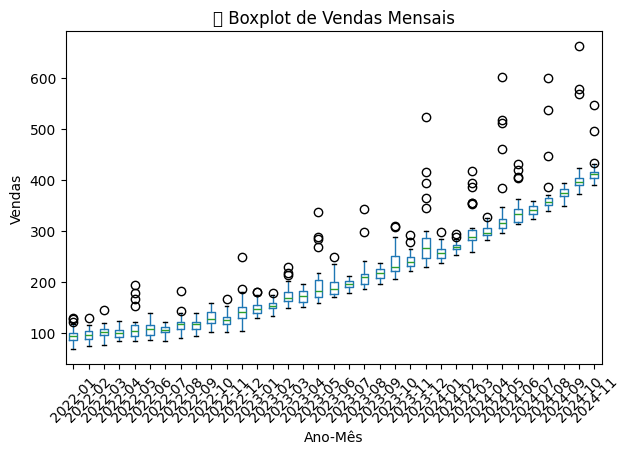

<Figure size 1200x600 with 0 Axes>

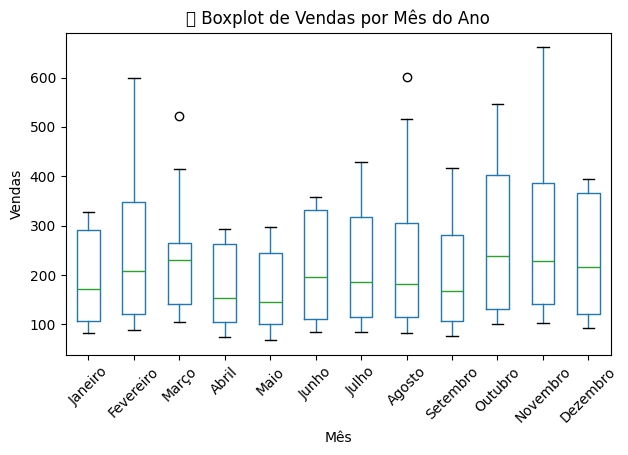

<Figure size 1400x600 with 0 Axes>

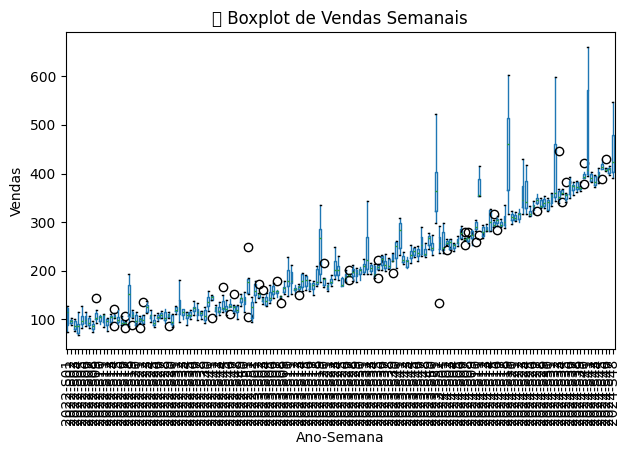

<Figure size 1000x600 with 0 Axes>

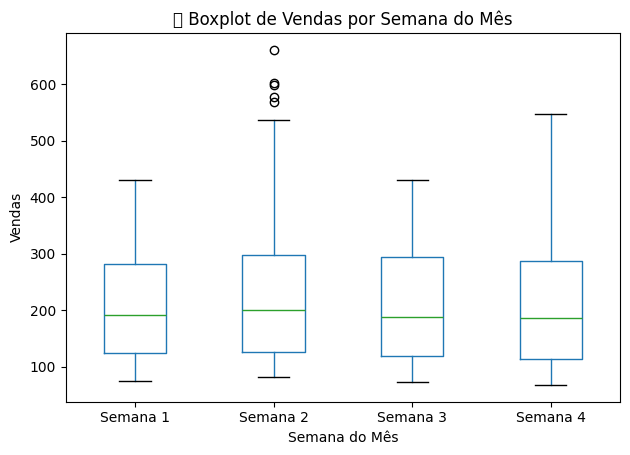


📅 Previsão diária para Dezembro de 2024:
    dia dia_da_semana  vendas_previstas  media_historica_vendas
0     1        Sunday             512.0              259.500000
1     2        Monday             487.0              201.500000
2     3       Tuesday             471.0              201.500000
3     4     Wednesday             466.0              201.500000
4     5      Thursday             460.0              201.500000
5     6        Friday             450.0              201.500000
6     7      Saturday             447.0              201.500000
7     8        Sunday             442.0              201.500000
8     9        Monday             444.0              194.500000
9    10       Tuesday             441.0              194.500000
10   11     Wednesday             441.0              194.500000
11   12      Thursday             436.0              194.500000
12   13        Friday             424.0              194.500000
13   14      Saturday             420.0              194.50000

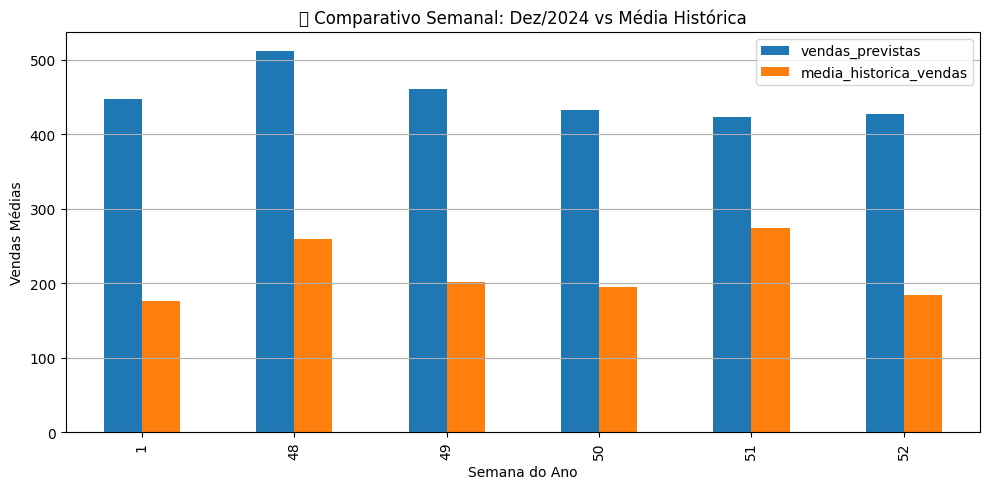


📐 Métricas de Avaliação da Previsão:
Métrica        Valor
     DM   226.729263
    MAD   226.729263
    MSE 53313.025963
   RMSE   230.896137
   MADE   226.729263


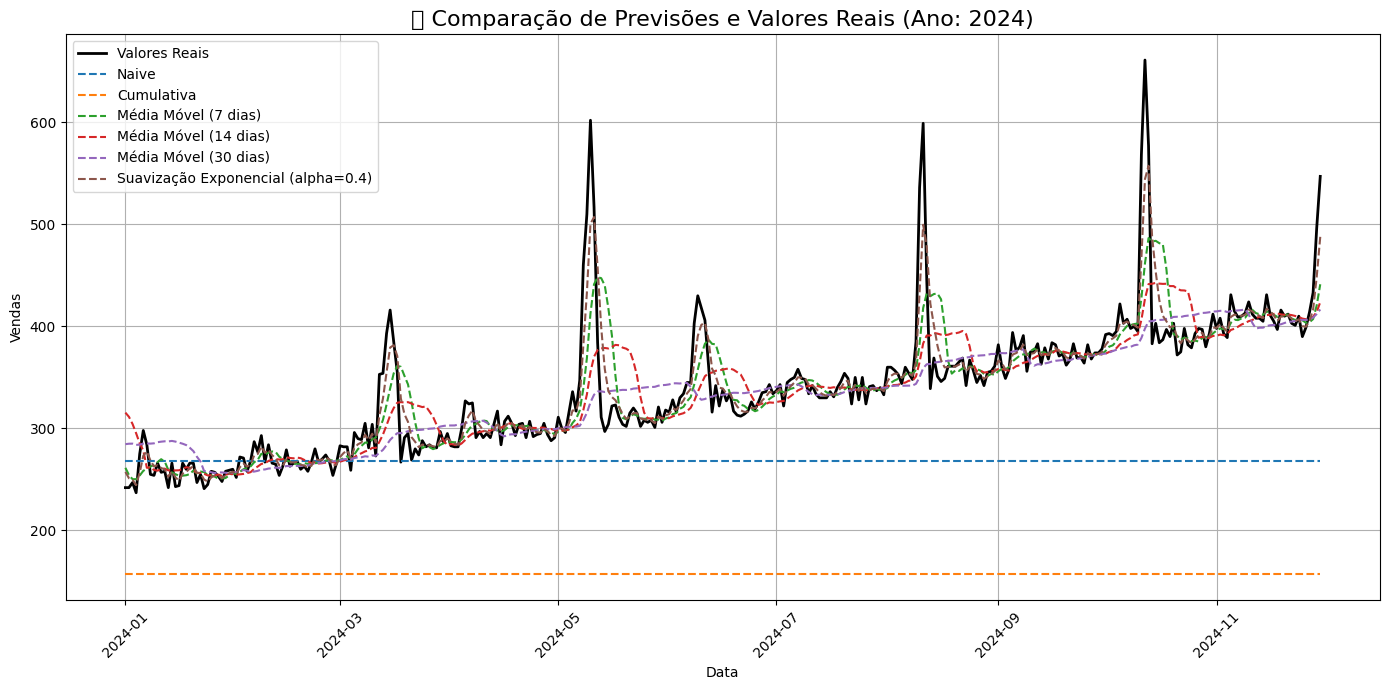


📐 Erro Médio Absoluto (MAD) para cada método:
                Método        MAD
                 Naive  73.797015
            Cumulativa 181.675608
  Média Móvel (7 dias)  19.033262
 Média Móvel (14 dias)  23.504691
 Média Móvel (30 dias)  22.300199
Suavização Exponencial  10.908465

🏅 O método com menor erro médio absoluto (MAD) é: Suavização Exponencial com MAD = 10.91


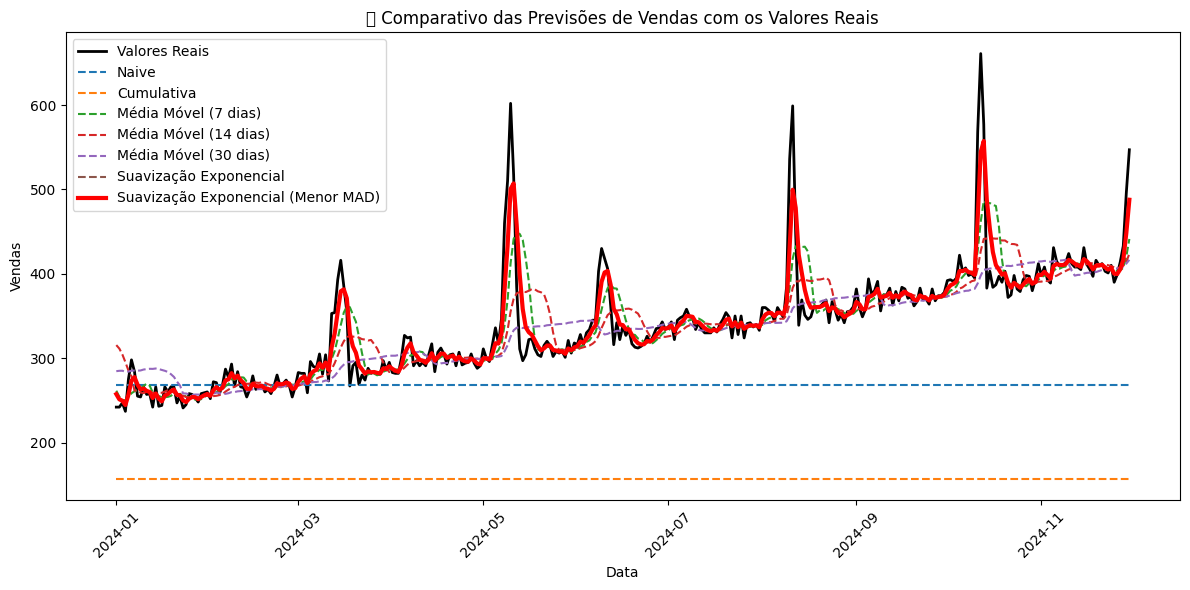

Saving 25.04.22.Dados.xlsx to 25.04.22.Dados (6).xlsx
Base de dados pronta com 7 defasagens de vendas:


,Vendas,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Data,,,,,,,,
2022-01-08,121,115.0,128.0,126.0,92.0,75.0,94.0,96.0
2022-01-09,86,121.0,115.0,128.0,126.0,92.0,75.0,94.0
2022-01-10,102,86.0,121.0,115.0,128.0,126.0,92.0,75.0
2022-01-11,96,102.0,86.0,121.0,115.0,128.0,126.0,92.0
2022-01-12,94,96.0,102.0,86.0,121.0,115.0,128.0,126.0
...,...,...,...,...,...,...,...,...
2024-11-26,399,390.0,410.0,401.0,403.0,412.0,410.0,416.0
2024-11-27,414,399.0,390.0,410.0,401.0,403.0,412.0,410.0
2024-11-28,433,414.0,399.0,390.0,410.0,401.0,403.0,412.0


In [ ]:
# ✅ Instalar pacotes necessários
!pip install pandas numpy matplotlib statsmodels openpyxl --quiet

# ✅ Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import locale
from google.colab import files

print("Insira os dados em excel:")

# ✅ Configuração de ambiente
warnings.filterwarnings('ignore')

try:
    locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
except locale.Error:
    locale.setlocale(locale.LC_TIME, '')
    print("⚠️ Aviso: 'pt_BR.UTF-8' não disponível no Colab. Usando localidade padrão.")

# ✅ Upload do arquivo Excel
uploaded = files.upload()
arquivo = list(uploaded.keys())[0]

# ✅ Leitura e pré-processamento dos dados
df = pd.read_excel(arquivo)
print("📌 Colunas encontradas no Excel:", df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

if 'timestamp' not in df.columns:
    raise KeyError("❌ A coluna 'timestamp' não foi encontrada no Excel.")
df.rename(columns={'timestamp': 'data'}, inplace=True)

col_vendas = [col for col in df.columns if any(keyword in col for keyword in ['venda', 'vendas'])]
if not col_vendas:
    print("Colunas disponíveis:", df.columns.tolist())
    coluna_sugerida = df.columns[1]
    print(f"Sugestão: Renomear a coluna '{coluna_sugerida}' para 'vendas'")
    df.rename(columns={coluna_sugerida: 'vendas'}, inplace=True)
else:
    df.rename(columns={col_vendas[0]: 'vendas'}, inplace=True)

df['data'] = pd.to_datetime(df['data'])
df = df.sort_values('data').set_index('data')

df['ano'] = df.index.year
df['mes'] = df.index.month
df['semana'] = df.index.isocalendar().week

# ✅ Decomposição da série temporal
%matplotlib inline
decomp = seasonal_decompose(df['vendas'], model='additive', period=30)
decomp.plot()
plt.suptitle('🔍 Decomposição da Série Temporal', fontsize=14)
plt.tight_layout()
plt.show()

# ✅ Gráfico de barras: Vendas totais por ano
vendas_anuais = df.groupby('ano')['vendas'].sum().reset_index()
vendas_anuais.plot(x='ano', y='vendas', kind='bar', figsize=(8,5), color='skyblue', legend=False)
plt.title('📈 Vendas Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ✅ Distribuição mensal de vendas (histórico)
vendas_mensal = df.groupby(['ano', 'mes'])['vendas'].sum().reset_index()
vendas_mensal['ano_mes'] = vendas_mensal['ano'].astype(str) + '-' + vendas_mensal['mes'].astype(str).str.zfill(2)
vendas_mensal.plot(x='ano_mes', y='vendas', kind='bar', figsize=(12,5), legend=False)
plt.title('📅 Distribuição Mensal de Vendas')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ✅ Distribuição semanal de vendas (histórico)
vendas_semanal = df.groupby(['ano', 'semana'])['vendas'].sum().reset_index()
vendas_semanal['ano_semana'] = vendas_semanal['ano'].astype(str) + '-S' + vendas_semanal['semana'].astype(str).str.zfill(2)
vendas_semanal.plot(x='ano_semana', y='vendas', kind='bar', figsize=(14,5), legend=False)
plt.title('📅 Distribuição Semanal de Vendas')
plt.xlabel('Ano-Semana')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ✅ Semana dentro do mês
def semana_do_mes(dia):
    if dia <= 7:
        return 'Semana 1'
    elif dia <= 14:
        return 'Semana 2'
    elif dia <= 21:
        return 'Semana 3'
    else:
        return 'Semana 4'

df['semana_mes'] = df.index.day.map(semana_do_mes)

# ✅ Agrupamento por ano, mês e semana do mês
vendas_semana_mes = (
    df.groupby(['ano', 'mes', 'semana_mes'])['vendas']
    .sum()
    .reset_index()
    .sort_values(['ano', 'mes', 'semana_mes'])
)

# ✅ Criar coluna ano-mês para o eixo
vendas_semana_mes['ano_mes'] = vendas_semana_mes['ano'].astype(str) + '-' + vendas_semana_mes['mes'].astype(str).str.zfill(2)

# ✅ Pivotar para ter cada semana como uma barra separada
pivot = vendas_semana_mes.pivot_table(index='ano_mes', columns='semana_mes', values='vendas', fill_value=0)

# ✅ Plotar gráfico
pivot.plot(kind='bar', figsize=(14,6))
plt.title('📅 Distribuição Semanal Dentro do Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.legend(title='Semana do Mês')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ✅ Boxplot: Distribuição mensal de vendas
plt.figure(figsize=(12,6))
df['ano_mes'] = df['ano'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2)
df.boxplot(column='vendas', by='ano_mes', grid=False)
plt.title('📦 Boxplot de Vendas Mensais')
plt.suptitle('')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Nomear os meses
meses_nome = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
df['mes_nome'] = df['mes'].map(meses_nome)

# ✅ Boxplot: Distribuição das vendas pelos 12 meses do ano (com nomes)
plt.figure(figsize=(12,6))
order_meses = list(meses_nome.values())
df.boxplot(column='vendas', by='mes_nome', grid=False)
plt.title('📦 Boxplot de Vendas por Mês do Ano')
plt.suptitle('')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(ticks=np.arange(1,13), labels=order_meses, rotation=45)
plt.tight_layout()
plt.show()

# ✅ Boxplot: Distribuição semanal geral de vendas
df['ano_semana'] = df['ano'].astype(str) + '-S' + df['semana'].astype(str).str.zfill(2)
plt.figure(figsize=(14,6))
df.boxplot(column='vendas', by='ano_semana', grid=False)
plt.title('📦 Boxplot de Vendas Semanais')
plt.suptitle('')
plt.xlabel('Ano-Semana')
plt.ylabel('Vendas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ✅ Boxplot: Distribuição por semanas dentro do mês
plt.figure(figsize=(10,6))
df.boxplot(column='vendas', by='semana_mes', grid=False)
plt.title('📦 Boxplot de Vendas por Semana do Mês')
plt.suptitle('')
plt.xlabel('Semana do Mês')
plt.ylabel('Vendas')
plt.tight_layout()
plt.show()

# ✅ Modelo SARIMA
# Move the SARIMA model fitting and prediction here so prev_df is defined before use.
modelo = SARIMAX(df['vendas'], order=(1,1,1), seasonal_order=(1,1,1,30))
resultado = modelo.fit()

# ✅ Previsão para Dezembro/2024
inicio_prev = '2024-12-01'
fim_prev = '2024-12-31'
previsao = resultado.get_prediction(start=inicio_prev, end=fim_prev)
prev_df = previsao.summary_frame()[['mean']].rename(columns={'mean': 'vendas_previstas'})
prev_df['vendas_previstas'] = prev_df['vendas_previstas'].round(0)

prev_df['semana'] = prev_df.index.isocalendar().week
prev_df['dia'] = prev_df.index.day
prev_df['dia_da_semana'] = prev_df.index.strftime('%A')
prev_df['ano'] = prev_df.index.year

# ✅ Médias semanais históricas
df_treino = df[df.index < '2024-12-01']
media_semanal_hist = (
    df_treino.groupby('semana')['vendas']
    .mean()
    .reset_index()
    .rename(columns={'vendas': 'media_historica_vendas'})
)

# ✅ Junta previsão com histórico semanal
prev_df = prev_df.merge(media_semanal_hist, on='semana', how='left')

# ✅ Exibe tabela final
print("\n📅 Previsão diária para Dezembro de 2024:")
print(prev_df[['dia', 'dia_da_semana', 'vendas_previstas', 'media_historica_vendas']])

# ✅ Gráfico comparativo por semana
# This section now comes AFTER prev_df is defined.
agrupado = prev_df.groupby('semana')[['vendas_previstas', 'media_historica_vendas']].mean()
agrupado.plot(kind='bar', figsize=(10,5))
plt.title('📊 Comparativo Semanal: Dez/2024 vs Média Histórica')
plt.xlabel('Semana do Ano')
plt.ylabel('Vendas Médias')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ✅ Cálculo das métricas de erro
prev_df['erro'] = prev_df['vendas_previstas'] - prev_df['media_historica_vendas']
prev_df['erro_absoluto'] = prev_df['erro'].abs()
prev_df['erro_quadrado'] = prev_df['erro'] ** 2

dm = prev_df['erro'].mean()
mad = prev_df['erro_absoluto'].mean()
mse = prev_df['erro_quadrado'].mean()
rmse = np.sqrt(mse)
made = mad

metricas_df = pd.DataFrame({
    'Métrica': ['DM', 'MAD', 'MSE', 'RMSE', 'MADE'],
    'Valor': [dm, mad, mse, rmse, made]
})

print("\n📐 Métricas de Avaliação da Previsão:")
print(metricas_df.to_string(index=False))

# ✅ Previsão método naive para o último ano com dados completos
ultimo_ano = df.index.year.max()
dados_ultimo_ano = df[df.index.year == ultimo_ano]

# Último valor real antes do ano analisado
ultimo_valor_treino = df[df.index.year < ultimo_ano]['vendas'].iloc[-1]

# Série naive: repete o último valor conhecido para o ano inteiro
naive_pred = pd.Series(ultimo_valor_treino, index=dados_ultimo_ano.index)

# ✅ Previsão método cumulativo (média dos dados anteriores)
media_cumulativa = df[df.index.year < ultimo_ano]['vendas'].mean()
cumulativa_pred = pd.Series(media_cumulativa, index=dados_ultimo_ano.index)

# ✅ Previsão método de média móvel de 7 dias
media_movel_7 = df['vendas'].rolling(window=7).mean()
media_movel_7_pred = media_movel_7[df.index.year == ultimo_ano].dropna()

# ✅ Previsão método de média móvel de 14 dias
media_movel_14 = df['vendas'].rolling(window=14).mean()
media_movel_14_pred = media_movel_14[df.index.year == ultimo_ano].dropna()

# ✅ Previsão método de média móvel de 30 dias
media_movel_30 = df['vendas'].rolling(window=30).mean()
media_movel_30_pred = media_movel_30[df.index.year == ultimo_ano].dropna()

# ✅ Previsão método de suavização exponencial simples com alpha = 0.4
alpha = 0.4
suavizacao_exponencial = df['vendas'].ewm(alpha=alpha, adjust=False).mean()
suavizacao_exponencial_pred = suavizacao_exponencial[df.index.year == ultimo_ano]

# ✅ Gráfico de linhas com as 6 previsões e os valores reais
plt.figure(figsize=(14,7))
plt.plot(df.index[df.index.year == ultimo_ano], df['vendas'][df.index.year == ultimo_ano], label='Valores Reais', color='black', linewidth=2)
plt.plot(df.index[df.index.year == ultimo_ano], naive_pred, label='Naive', linestyle='--')
plt.plot(df.index[df.index.year == ultimo_ano], cumulativa_pred, label='Cumulativa', linestyle='--')
plt.plot(df.index[df.index.year == ultimo_ano], media_movel_7_pred, label='Média Móvel (7 dias)', linestyle='--')
plt.plot(df.index[df.index.year == ultimo_ano], media_movel_14_pred, label='Média Móvel (14 dias)', linestyle='--')
plt.plot(df.index[df.index.year == ultimo_ano], media_movel_30_pred, label='Média Móvel (30 dias)', linestyle='--')
plt.plot(df.index[df.index.year == ultimo_ano], suavizacao_exponencial_pred, label='Suavização Exponencial (alpha=0.4)', linestyle='--')

plt.title('📊 Comparação de Previsões e Valores Reais (Ano: {})'.format(ultimo_ano), fontsize=16)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Cálculo dos erros médios absolutos (MAD) para cada método de previsão
erro_naive = np.abs(naive_pred - df['vendas'][df.index.year == ultimo_ano])
erro_cumulativa = np.abs(cumulativa_pred - df['vendas'][df.index.year == ultimo_ano])
# Ensure alignment for errors with moving averages and exponential smoothing
erro_media_movel_7 = np.abs(media_movel_7_pred - df['vendas'][media_movel_7_pred.index])
erro_media_movel_14 = np.abs(media_movel_14_pred - df['vendas'][media_movel_14_pred.index])
erro_media_movel_30 = np.abs(media_movel_30_pred - df['vendas'][media_movel_30_pred.index])
erro_suavizacao_exponencial = np.abs(suavizacao_exponencial_pred - df['vendas'][suavizacao_exponencial_pred.index])


# ✅ MAD de cada método
mad_naive = erro_naive.mean()
mad_cumulativa = erro_cumulativa.mean()
mad_media_movel_7 = erro_media_movel_7.mean()
mad_media_movel_14 = erro_media_movel_14.mean()
mad_media_movel_30 = erro_media_movel_30.mean()
mad_suavizacao_exponencial = erro_suavizacao_exponencial.mean()

# ✅ Criação do DataFrame para exibir os resultados
metricas_mad = pd.DataFrame({
    'Método': ['Naive', 'Cumulativa', 'Média Móvel (7 dias)', 'Média Móvel (14 dias)', 'Média Móvel (30 dias)', 'Suavização Exponencial'],
    'MAD': [mad_naive, mad_cumulativa, mad_media_movel_7, mad_media_movel_14, mad_media_movel_30, mad_suavizacao_exponencial]
})

# ✅ Exibição das métricas de erro
print("\n📐 Erro Médio Absoluto (MAD) para cada método:")
print(metricas_mad.to_string(index=False))

# ✅ Identificar o método com menor MAD
melhor_metodo = metricas_mad.loc[metricas_mad['MAD'].idxmin()]
print(f"\n🏅 O método com menor erro médio absoluto (MAD) é: {melhor_metodo['Método']} com MAD = {melhor_metodo['MAD']:.2f}")

# ✅ Gráfico de linha para comparar as previsões com os valores reais
plt.figure(figsize=(12, 6))

# Valores reais do último ano
plt.plot(df.loc[df.index.year == ultimo_ano].index, df['vendas'][df.index.year == ultimo_ano], label='Valores Reais', color='black', linewidth=2)

# Previsões dos diferentes métodos
plt.plot(df.loc[df.index.year == ultimo_ano].index, naive_pred, label='Naive', linestyle='--')
plt.plot(df.loc[df.index.year == ultimo_ano].index, cumulativa_pred, label='Cumulativa', linestyle='--')
# Ensure the index aligns when plotting moving averages and exponential smoothing
plt.plot(media_movel_7_pred.index, media_movel_7_pred, label='Média Móvel (7 dias)', linestyle='--')
plt.plot(media_movel_14_pred.index, media_movel_14_pred, label='Média Móvel (14 dias)', linestyle='--')
plt.plot(media_movel_30_pred.index, media_movel_30_pred, label='Média Móvel (30 dias)', linestyle='--')
plt.plot(suavizacao_exponencial_pred.index, suavizacao_exponencial_pred, label='Suavização Exponencial', linestyle='--')


# Destaque para o método com o menor MAD
# Map the best method name string to the actual prediction Series variable
prediction_series_map = {
    'Naive': naive_pred,
    'Cumulativa': cumulativa_pred,
    'Média Móvel (7 dias)': media_movel_7_pred,
    'Média Móvel (14 dias)': media_movel_14_pred,
    'Média Móvel (30 dias)': media_movel_30_pred,
    'Suavização Exponencial': suavizacao_exponencial_pred
}

melhor_metodo_pred_series = prediction_series_map[melhor_metodo['Método']]

# Ensure the index aligns for the best method plot as well
plt.plot(melhor_metodo_pred_series.index, melhor_metodo_pred_series,
         label=f'{melhor_metodo["Método"]} (Menor MAD)', linewidth=3, color='red')

# Ajustes finais no gráfico
plt.title('📊 Comparativo das Previsões de Vendas com os Valores Reais')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Bibliotecas essenciais
import pandas as pd
from google.colab import files

# Envio do arquivo Excel pelo usuário
arquivo_enviado = files.upload()

# Leitura do Excel em um DataFrame
tabela = pd.read_excel(next(iter(arquivo_enviado)))

# Padronização das colunas
tabela.columns = ['Data', 'Vendas']
tabela['Data'] = pd.to_datetime(tabela['Data'], dayfirst=True)
tabela.set_index('Data', inplace=True)

# Geração de variáveis defasadas (lags)
for atraso in range(1, 8):
    tabela[f'Lag_{atraso}'] = tabela['Vendas'].shift(atraso)

# Eliminação de registros com valores ausentes
tabela.dropna(inplace=True)

# Exibição do resultado final
print("Base de dados pronta com 7 defasagens de vendas:")
display(tabela)
